#CHAPTER 10 - SIMPLE LINEAR REGRESSION 

## By Olivia Saroukos

## What does a Simple Linear Regression do?
#### It transfers large amount of raw data into actionable information. It also determines how strong a relationship is between two variables. 

In [1]:
import pandas as pd

In [3]:
import seaborn as sns

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
data = sns.load_dataset('diamonds')

In [28]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
- The r-value indicates positive correlation between x and y.
- The value of r range from -1 to 1.
- If r > 0 this indicates a positive correlation.
- If r < 0 this indicates a negative correlation.
- If r = 0 this indicates that there is no correlation.

In [87]:
import numpy as np

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [95]:
data.corr(numeric_only = True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

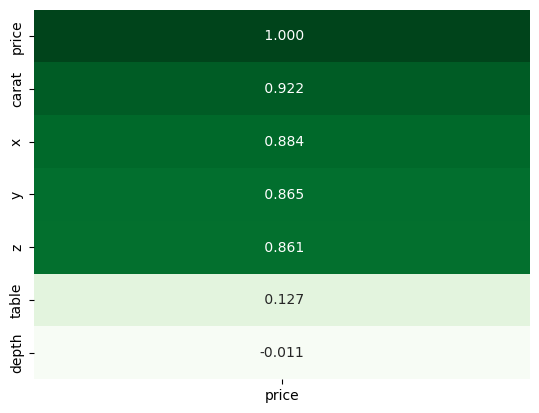

In [99]:
sns.heatmap(data.corr(numeric_only = True)[['price']].sort_values(by='price', ascending = False),
            annot=True, cmap='Greens', cbar=False, fmt=f' .3f')

## Procedure for Creating and Using a Regression Model 
1. Identify and collect data for relevant variables, both independent and dependent 
2. Check the relationship between each predictor and response variable. 
3. Specify and assess your regression model, using simple or multiple linear regression as appropriate.
4. If you have a model that adequately fits the data, use it to make predictions. 

In [102]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [104]:
x_train, x_test, y_train, y_test = train_test_split(
    data[['carat']], data[['price']],
    test_size=0.30, random_state=20)

In [108]:
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

LinearRegression()

In [110]:
linearModel.score(x_test, y_test)

0.8504107786474794

In [112]:
y_predicted = linearModel.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [114]:
predicted = pd.DataFrame(y_predicted, columns=['Predicted_Price'])

In [118]:
predicted.head(3)

,Predicted_Price
0,9540.641914
1,1940.075433
2,3180.984246


In [122]:
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])

In [128]:
melted = pd.melt(combined, id_vars=['carat'],
                 value_vars=['price','Predicted_Price'],
                 var_name='price_type', value_name='price_value')

In [130]:
melted.head()

,carat,price_type,price_value
0,1.52,price,8674.0
1,0.54,price,1637.0
2,0.70,price,2657.0
3,0.59,price,1838.0
4,0.86,price,2980.0


In [132]:
display(melted)

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,Predicted_Price,156.269013
32360,1.01,Predicted_Price,5585.245072
32361,1.53,Predicted_Price,9618.198715
32362,0.23,Predicted_Price,-464.185393


<Axes: xlabel='carat', ylabel='price_value'>

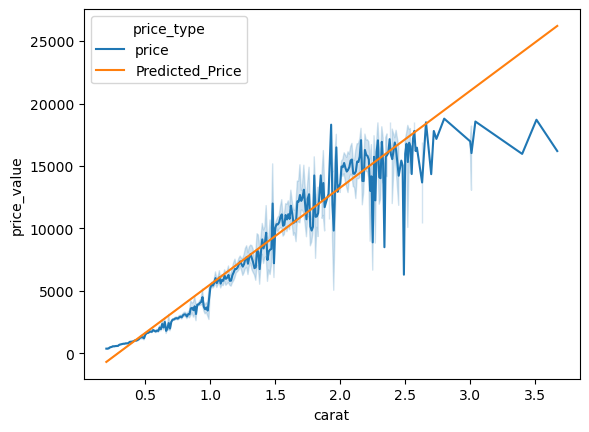

In [138]:
sns.lineplot(data=melted, x='carat', y='price_value', 
           hue='price_type')

## Regression line equation is **y** = **mx** + **b**

- y is the **dependent** variable 
- m is the **slope** of the line 
- x is the **independent** variable 
- b is the **Y-intercept**

In [142]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [144]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [146]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.360580045403


In [148]:
print(f'Regression line equation is y = [7756.42561797]x + -2256.360580045392')

Regression line equation is y = [7756.42561797]x + -2256.360580045392


In [150]:
print(f'The predicted price for a 0.70 carat diamond is $3,173.14')

The predicted price for a 0.70 carat diamond is $3,173.14


In [152]:
print(f'The predicted price for a 0.54 carat diamond is $1,932.11')

The predicted price for a 0.54 carat diamond is $1,932.11


## Are the estimates in the previous two cells close to the predicted prices in the results of step 18?

#### Yes, both of the estimates are within a few hundred dollar range of the predicted prices in the results of step 18.